# Time-Series Forecasting: Predicting Apple Stock Price Using An LSTM Model
Traditionally, most machine learning (ML) models have used some observations (samples / examples) as input features, but the data has no time dimension.

Models capable of predicting future values based on previously observed values are known as time-series forecasting models. For non-stationary data, time-series forecasting is widely used. Non-stationary data are those whose statistical features, such as mean and standard deviation, do not remain constant throughout time but instead change.

The non-stationary input data used as input to these models is typically called to as time-series. Temperature values over time, stock prices over time, and the price of a property over time are all instances of time-series. As a result, the input is a signal (time-series) characterised by observations recorded in a specific order throughout time.

## The LSTM model
- Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning

- LSTM Models, in a nutshell, can store data throughout time. When working with Time Series or Sequential Data, this is really handy.

- The Human Brain is remarkably similar to LSTM Models. When you hear someone speak to you:

In [1]:
import pandas_datareader as web # to read data from web
import pandas as pd
import numpy as np

In [2]:
# import the data
APPL_data= web.DataReader('AAPL',data_source="yahoo",start='2015-01-01',end='2021-09-30')
APPL_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,25.020121
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.782112
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.083963
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.086226
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.423967


In [3]:
APPL_data.shape

(1700, 6)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Closing price History')

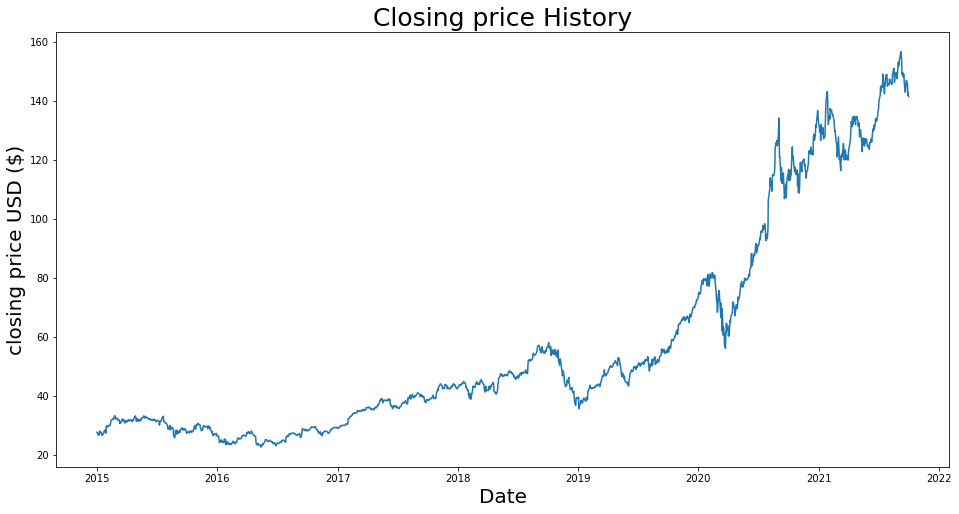

In [4]:
#lets look at the stock closing price of history
import seaborn as sns
plt.figure(figsize=(16,8))
sns.lineplot(x= APPL_data.index,y=APPL_data['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('closing price USD ($)',fontsize=20)
plt.title('Closing price History',fontsize=25)

#### I am using the AAPL dataset, which is already divided into training set and test set, but you can do the divison with a simple command!

In [5]:
# Split into train and test:
data_to_train = APPL_data[:1530]
data_to_test = APPL_data[1530:]

In [6]:
#Now, we can save the 2 csv files, Train and Test.
data_to_train.to_csv('train_data.csv')
data_to_test.to_csv('test_data.csv')

In [7]:
aapl_data= APPL_data.iloc[: , 3:4]
aapl_data.head()

,Close
Date,
2014-12-31,27.594999
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500


In [8]:
## We want to create a numpy arrary not a vector 
trainig_set= aapl_data.iloc[:1530,:].values


In [9]:
test_set= aapl_data.iloc[1530:,:].values


#### It’s a good idea to normalize the data before model fitting. This will boost the performance.

In [10]:
# Feature scalling, Here we will do normalizatioin 
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
trainig_set_scaled= sc.fit_transform(trainig_set)

#### After scaling the training data, we must format it into a three-dimensional array for use in our LSTM model. We accomplish this by generating 60 timestamps.

In [11]:
# Create a data structure with 60 timesteps and 1 output
X_train=[] #Independent variables
y_train= [] # Dependent variables 
# I am going to append past 60 days data 
for i in range(60,1530):
    X_train.append(trainig_set_scaled[i-60:i,0]) # Appending prevois 60 days data not including 60
    y_train.append(trainig_set_scaled[i,0])
    
X_train, y_train= np.array(X_train), np.array(y_train)


In [12]:
# lETS CHECK THE SHAPE OF X_train and y_train
X_train.shape, y_train.shape

((1470, 60), (1470,))

#### We have now reshaped the data into the following format (values, time-steps, 1 dimensional output).

In [13]:
# LSMT Model needs to be 3- dimensional, so need to rehsape the x_train, y_train
# Reshaping
#numpy.reshape(array, shape, order = 'C')
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1470, 60, 1)

#### Now, it’s time to build the model. We will build the LSTM with 100 neurons and 5 hidden layers. Finally, we will assign 1 neuron in the output layer for predicting the normalized stock price. We will use the MSE loss function and the Adam stochastic gradient descent optimizer.

In [14]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#  Initialising the RNN
model= Sequential()

# Adding first LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(rate=0.2))

# Adding second LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.2))

# Adding third LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.2))

# Adding fourth LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.2))

# Adding fifth LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100))
model.add(Dropout(rate=0.2))

# Adding the Output Layer
model.add(Dense(units=1))

# Compiling the Model
# Because we're doing regression hence mean_squared_error
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 100)           8

**We use Dropout layers to avoid Overfitting problems, and besides that, we use the parameter “return_sequences” to determine if the layer will return a sequence compatible with a LSTM. We use “return_sequences=True” when we have a LSTM layer after**

In [16]:
# Fitting the model to the Training set
history=model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
46/46 [==============================] - 38s 427ms/step - loss: 0.0085
Epoch 2/100
46/46 [==============================] - 19s 406ms/step - loss: 0.0032
Epoch 3/100
46/46 [==============================] - 19s 405ms/step - loss: 0.0030
Epoch 4/100
46/46 [==============================] - 18s 385ms/step - loss: 0.0018
Epoch 5/100
46/46 [==============================] - 17s 378ms/step - loss: 0.0023
Epoch 6/100
46/46 [==============================] - 17s 376ms/step - loss: 0.0015
Epoch 7/100
46/46 [==============================] - 17s 374ms/step - loss: 0.0016
Epoch 8/100
46/46 [==============================] - 17s 375ms/step - loss: 0.0012
Epoch 9/100
46/46 [==============================] - 17s 374ms/step - loss: 0.0017
Epoch 10/100
46/46 [==============================] - 17s 375ms/step - loss: 0.0017
Epoch 11/100
46/46 [==============================] - 17s 375ms/step - loss: 0.0012
Epoch 12/100
46/46 [==============================] - 17s 373ms/step - loss: 0.0016
E

46/46 [==============================] - 17s 379ms/step - loss: 5.9452e-04
Epoch 96/100
46/46 [==============================] - 17s 376ms/step - loss: 5.4686e-04
Epoch 97/100
46/46 [==============================] - 17s 376ms/step - loss: 6.3875e-04
Epoch 98/100
46/46 [==============================] - 17s 374ms/step - loss: 4.8707e-04
Epoch 99/100
46/46 [==============================] - 17s 378ms/step - loss: 6.2210e-04
Epoch 100/100
46/46 [==============================] - 17s 374ms/step - loss: 6.6897e-04


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

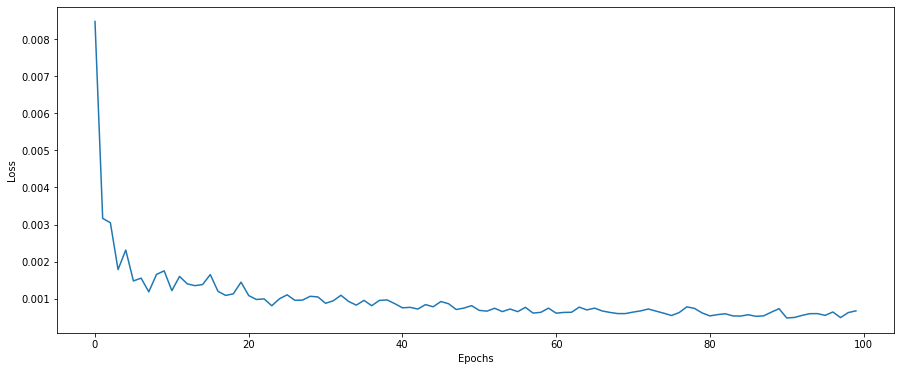

In [17]:
# Evaluating The Model
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


## Making Predictions
To make predictions, we need to use our Test Dataset and format him like we did in the Train Dataset before.

In [18]:
#GEtting ready both train and est data set
train_data= pd.read_csv('train_data.csv')
test_data= pd.read_csv('test_data.csv')

In [19]:
real_stock_price = test_data.iloc[:, 3:4].values

In [20]:
real_stock_price.shape

(170, 1)

In [21]:
test_set.shape

(170, 1)

In [22]:
# Hence we will concatenate the dataset and then scale them
data_total= pd.concat([train_data['Close'], test_data['Close']],  axis=0)
inputs= data_total[len(data_total)-len(test_data)-60:].values 
inputs = inputs.reshape(-1,1) 
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 230):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
# 3D format
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [23]:
inputs.shape

(230, 1)

In [24]:
data_total.shape

(1700,)

In [25]:
X_test.shape

(170, 60, 1)

#### After format the Test Data, we can make predictions in our X_test.

In [26]:
#preict the model
predicted_stock_price = model.predict(X_test)

#### But before plot our predictions, we need to make a inverse_transform() in the predictions array, because we make predictions using the Scale, so our predictions are between 0 and 1.

In [27]:
# Inverse the scaling
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

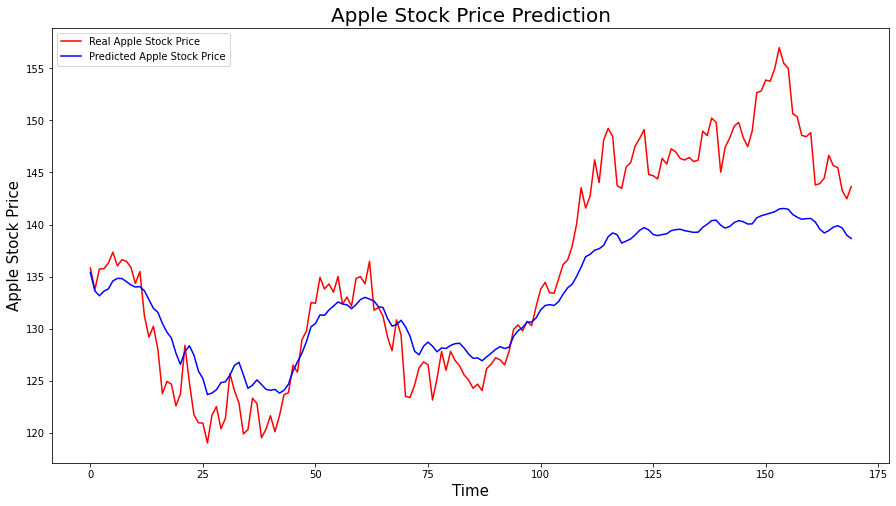

In [31]:
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(real_stock_price, color='Red', label='Real Apple Stock Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction',fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Apple Stock Price',fontsize=15)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

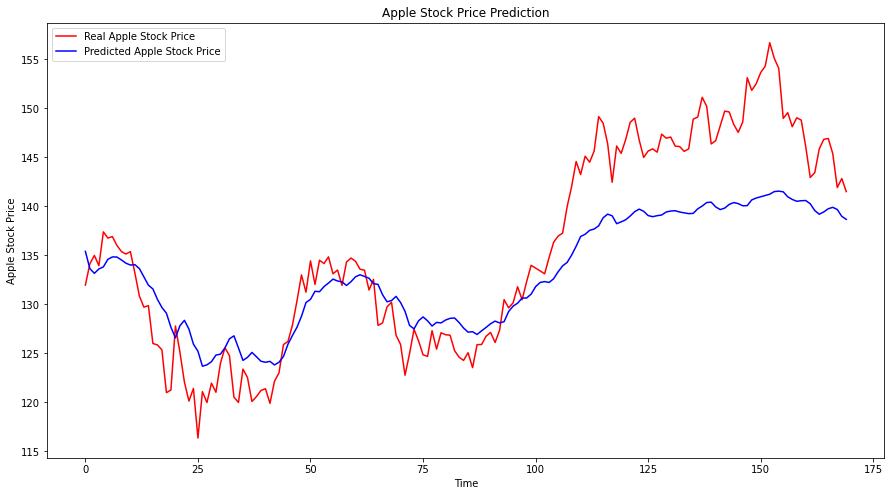

In [32]:
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(test_set, color='Red', label='Real Apple Stock Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

### Conclusion:

Our model performed admirably, as can be seen. It can accurately follow most unusual jumps/drops; however, we can observe that the model expected (predicted) lower values than the actual stock price for the most recent date stamps.